http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html


In [2]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y)

array([0, 1, 2])

i.e. the possible classifications for iris_y are the unique possible values, or 0, 1, 2

In [3]:
# Split iris data in train and test data
# A random permutation, to split the data randomly
np.random.seed(0)
indices = np.random.permutation(len(iris_X)) # This call gives us a list of random indices to create a train/test sets with
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test  = iris_X[indices[-10:]]
iris_y_test  = iris_y[indices[-10:]]
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [4]:
knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [5]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

Automatically created module for IPython interactive environment


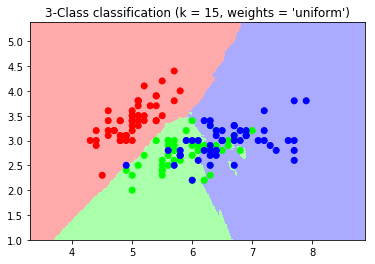

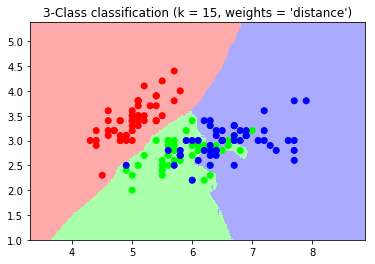

In [6]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [7]:
# Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

In [8]:
xx

array([[ 3.3 ,  3.32,  3.34, ...,  8.84,  8.86,  8.88],
       [ 3.3 ,  3.32,  3.34, ...,  8.84,  8.86,  8.88],
       [ 3.3 ,  3.32,  3.34, ...,  8.84,  8.86,  8.88],
       ..., 
       [ 3.3 ,  3.32,  3.34, ...,  8.84,  8.86,  8.88],
       [ 3.3 ,  3.32,  3.34, ...,  8.84,  8.86,  8.88],
       [ 3.3 ,  3.32,  3.34, ...,  8.84,  8.86,  8.88]])

What is a meshgrid? https://stackoverflow.com/questions/36013063/what-is-purpose-of-meshgrid-in-python

Automatically created module for IPython interactive environment


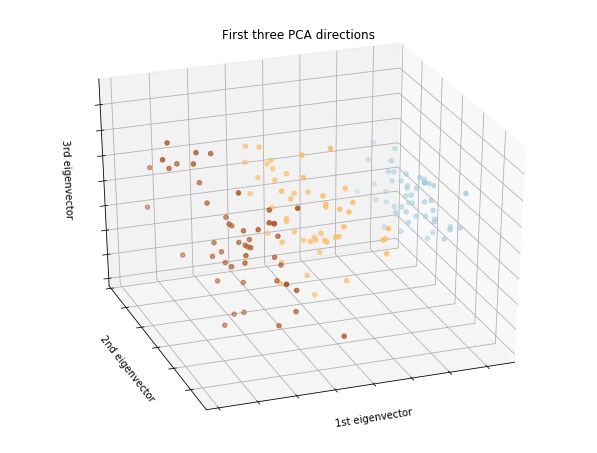

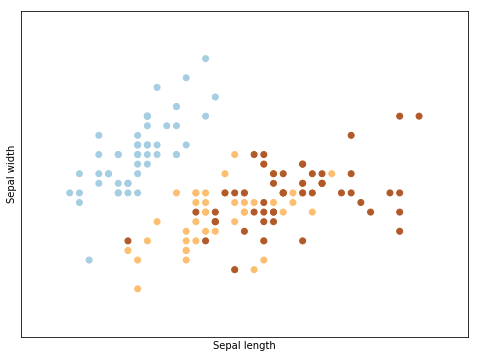

In [10]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
# Created a 3D axsis and then create a plot on it
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Paired)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [9]:
diabetes = datasets.load_diabetes()
diabetes_X_train = diabetes.data[:-20]
diabetes_X_test  = diabetes.data[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test  = diabetes.target[-20:]

In [11]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
print(regr.coef_)

[  3.03499549e-01  -2.37639315e+02   5.10530605e+02   3.27736980e+02
  -8.14131709e+02   4.92814588e+02   1.02848452e+02   1.84606489e+02
   7.43519617e+02   7.60951722e+01]


In [13]:
# The mean square error
np.mean((regr.predict(diabetes_X_test)-diabetes_y_test)**2)

2004.5676026898223

In [14]:
# Explained variance score: 1 is perfect prediction
# and 0 means that there is no linear relationship
# between X and y.
regr.score(diabetes_X_test, diabetes_y_test)

0.58507530226905713

Automatically created module for IPython interactive environment
Coefficients: 
 [ 938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


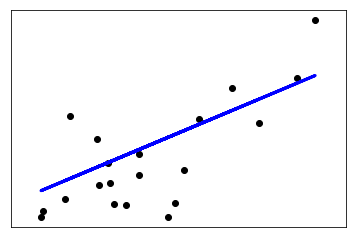

In [15]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

If there are few data points per dimension, noise in the observations induces high variance:

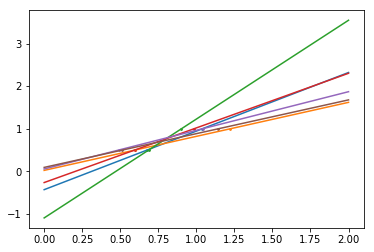

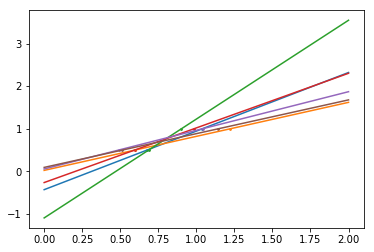

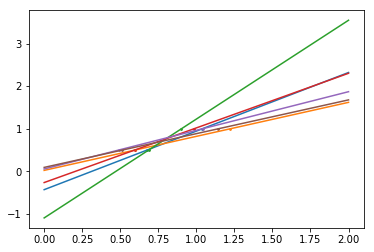

In [20]:
X = np.c_[ .5, 1].T
y = [.5, 1]
test = np.c_[ 0, 2].T
regr = linear_model.LinearRegression()

import matplotlib.pyplot as plt 
plt.figure() 

np.random.seed(0)
for _ in range(6): 
   this_X = .1*np.random.normal(size=(2, 1)) + X
   regr.fit(this_X, y)
   plt.plot(test, regr.predict(test)) 
   plt.scatter(this_X, y, s=3)  
    
plt.show()

A solution in high-dimensional statistical learning is to shrink the regression coefficients to zero: any two randomly chosen set of observations are likely to be uncorrelated. This is called Ridge regression:

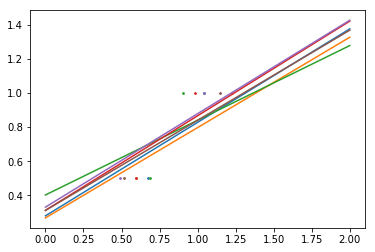

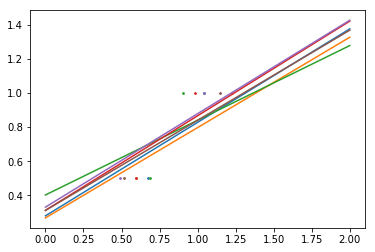

In [22]:
regr = linear_model.Ridge(alpha=.1)

plt.figure() 

np.random.seed(0)
for _ in range(6): 
   this_X = .1*np.random.normal(size=(2, 1)) + X
   regr.fit(this_X, y)
   plt.plot(test, regr.predict(test)) 
   plt.scatter(this_X, y, s=3) 

plt.show()

In [32]:
# https://stackoverflow.com/questions/10894323/what-does-the-c-underscore-expression-c-do-exactly
X = np.c_[ .5, 1].T
y = [.5, 1]
print(X)
print(y)

[[ 0.5]
 [ 1. ]]
[0.5, 1]


In [33]:
alphas = np.logspace(-4, -1, 6)
from __future__ import print_function
print([regr.set_params(alpha=alpha
            ).fit(diabetes_X_train, diabetes_y_train,
            ).score(diabetes_X_test, diabetes_y_test) for alpha in alphas])

[0.47255235801925194, 0.47248350131491612, 0.47220902528656805, 0.47111084422404531, 0.46665913731369962, 0.44804367281067803]


In [34]:
alphas

array([ 0.0001    ,  0.00039811,  0.00158489,  0.00630957,  0.02511886,
        0.1       ])

Example of Lasso is a sparse model with some coefficients set to zero

In [44]:
regr = linear_model.Lasso()
scores = [regr.set_params(alpha=alpha).fit(diabetes_X_train, diabetes_y_train).score(diabetes_X_test, diabetes_y_test)
       for alpha in alphas]

scores

[0.47256506260362063,
 0.47253409240820693,
 0.47241063989194998,
 0.47191666327202086,
 0.46991043228832829,
 0.4612946822333609]

In [45]:
best_alpha = alphas[scores.index(max(scores))]
regr.alpha = best_alpha
regr.fit(diabetes_X_train, diabetes_y_train)

print(regr.coef_)

[ 938.19370439]


In [46]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(iris_X_train, iris_y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Automatically created module for IPython interactive environment


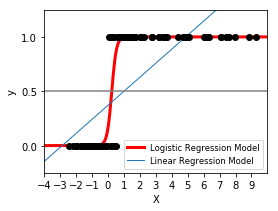

In [47]:
print(__doc__)


# Code source: Gael Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

# this is our test set, it's just a straight line with some
# Gaussian noise
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]
# run the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)


def model(x):
    return 1 / (1 + np.exp(-x))
loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.show()

Automatically created module for IPython interactive environment


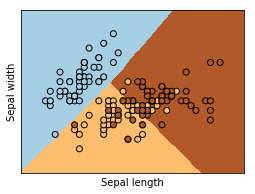

In [48]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

h = .02  # step size in the mesh

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

Exercise
Try classifying the digits dataset with nearest neighbors and a linear model. Leave out the last 10% and test prediction performance on these observations.

In [55]:
from sklearn import datasets, neighbors, linear_model

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target
X_train = X_digits[:-10]
y_train = y_digits[:-10]
X_test = X_digits[-10:]
y_test = y_digits[-10:]

In [56]:
linr = linear_model.LinearRegression()
linr.fit(X_train, y_train)
p = linr.predict(X_test)
print(p)
print(y_test)

[ 7.01785182  2.75570626  4.04426873  3.91523444  4.44370151  8.08125875
  0.70934708  7.18568382  5.84047984  8.83303969]
[5 4 8 8 4 9 0 8 9 8]


In [58]:
lr = linear_model.LogisticRegression()
lr.fit(X_train, y_train)
p = lr.predict(X_test)
print(p)
print(y_test)

[5 4 8 8 4 9 0 8 9 8]
[5 4 8 8 4 9 0 8 9 8]


In [59]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
p = knn.predict(X_test)
print(p)
print(y_test)

[5 4 8 8 4 9 0 8 9 8]
[5 4 8 8 4 9 0 8 9 8]


In [61]:
"""
================================
Digits Classification Exercise
================================

A tutorial exercise regarding the use of classification techniques on
the Digits dataset.

This exercise is used in the :ref:`clf_tut` part of the
:ref:`supervised_learning_tut` section of the
:ref:`stat_learn_tut_index`.
"""
print(__doc__)

from sklearn import datasets, neighbors, linear_model

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

n_samples = len(X_digits)

X_train = X_digits[:int(.9 * n_samples)]
y_train = y_digits[:int(.9 * n_samples)]
X_test = X_digits[int(.9 * n_samples):]
y_test = y_digits[int(.9 * n_samples):]

knn = neighbors.KNeighborsClassifier()
logistic = linear_model.LogisticRegression()

print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))
print('LogisticRegression score: %f'
      % logistic.fit(X_train, y_train).score(X_test, y_test))


Digits Classification Exercise

A tutorial exercise regarding the use of classification techniques on
the Digits dataset.

This exercise is used in the :ref:`clf_tut` part of the
:ref:`supervised_learning_tut` section of the
:ref:`stat_learn_tut_index`.

KNN score: 0.961111
LogisticRegression score: 0.938889



Digits Classification Exercise

A tutorial exercise regarding the use of classification techniques on
the Digits dataset.

This exercise is used in the :ref:`clf_tut` part of the
:ref:`supervised_learning_tut` section of the
:ref:`stat_learn_tut_index`.



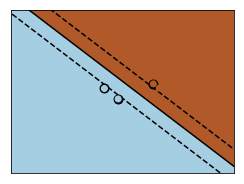

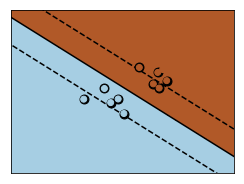

In [86]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# figure number
fignum = 1

# fit the model
for name, penalty in (('unreg', 1), ('reg', 0.05)):

    clf = svm.SVC(kernel='linear', C=penalty)
    clf.fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy + a * margin
    yy_up = yy - a * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='black', zorder=10)
    plt.scatter(X[:, 0], X[:, 1], c=Y, facecolors='black', zorder=10, cmap=plt.cm.Paired)

    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

In [87]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(iris_X_train, iris_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Classes are not always linearly separable in feature space. The solution is to build a decision function that is not linear but may be polynomial instead. This is done using the kernel trick that can be seen as creating a decision energy by positioning kernels on observations:


Digits Classification Exercise

A tutorial exercise regarding the use of classification techniques on
the Digits dataset.

This exercise is used in the :ref:`clf_tut` part of the
:ref:`supervised_learning_tut` section of the
:ref:`stat_learn_tut_index`.



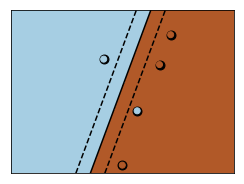

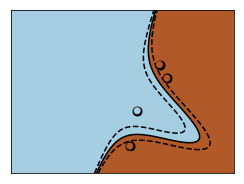

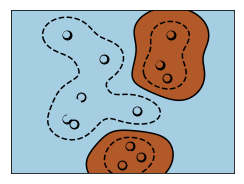

In [89]:
print(__doc__)


# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


# Our dataset and targets
X = np.c_[(.4, -.7),
          (-1.5, -1),
          (-1.4, -.9),
          (-1.3, -1.2),
          (-1.1, -.2),
          (-1.2, -.4),
          (-.5, 1.2),
          (-1.5, 2.1),
          (1, 1),
          # --
          (1.3, .8),
          (1.2, .5),
          (.2, -2),
          (.5, -2.4),
          (.2, -2.3),
          (0, -2.7),
          (1.3, 2.1)].T
Y = [0] * 8 + [1] * 8

# figure number
fignum = 1

# fit the model
for kernel in ('linear', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=2)
    clf.fit(X, Y)

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='black', zorder=10)
    plt.scatter(X[:, 0], X[:, 1], c=Y, facecolors='black', zorder=10, cmap=plt.cm.Paired)

    plt.axis('tight')
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1
plt.show()

https://github.com/mmmayo13/scikit-learn-beginners-tutorials/blob/master/scikit-learn-2.ipynb

In [90]:
# Check out the iris dataset
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
data.shape

(150, 4)

In [91]:
# Check out the digits dataset
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

In [92]:
import pylab as pl 
pl.imshow(digits.images[-1], cmap=pl.cm.gray_r)

In [93]:
# Reshape dataset to be used with sklearn
data = digits.images.reshape((digits.images.shape[0], -1))

In [94]:
# Original shape
digits.images

array([[[  0.,   0.,   5., ...,   1.,   0.,   0.],
        [  0.,   0.,  13., ...,  15.,   5.,   0.],
        [  0.,   3.,  15., ...,  11.,   8.,   0.],
        ..., 
        [  0.,   4.,  11., ...,  12.,   7.,   0.],
        [  0.,   2.,  14., ...,  12.,   0.,   0.],
        [  0.,   0.,   6., ...,   0.,   0.,   0.]],

       [[  0.,   0.,   0., ...,   5.,   0.,   0.],
        [  0.,   0.,   0., ...,   9.,   0.,   0.],
        [  0.,   0.,   3., ...,   6.,   0.,   0.],
        ..., 
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   0., ...,  10.,   0.,   0.]],

       [[  0.,   0.,   0., ...,  12.,   0.,   0.],
        [  0.,   0.,   3., ...,  14.,   0.,   0.],
        [  0.,   0.,   8., ...,  16.,   0.,   0.],
        ..., 
        [  0.,   9.,  16., ...,   0.,   0.,   0.],
        [  0.,   3.,  13., ...,  11.,   5.,   0.],
        [  0.,   0.,   0., ...,  16.,   9.,   0.]],

       ..., 
       [[  0.,   0., 

In [95]:
# New shape
data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [96]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y)

array([0, 1, 2])

In [97]:
# Split iris data in train and test data
# A random permutation, to split the data randomly

np.random.seed(0)
indices = np.random.permutation(len(iris_X))

iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]

iris_X_test  = iris_X[indices[-10:]]
iris_y_test  = iris_y[indices[-10:]]

# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [98]:
# Predicted
knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [99]:
# Actual
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [100]:
# The diabetes dataset consists of 10 physiological variables (age, sex, weight, blood pressure)
# measured on 442 patients, and an indication of disease progression after one year

diabetes = datasets.load_diabetes()

diabetes_X_train = diabetes.data[:-20]
diabetes_X_test  = diabetes.data[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test  = diabetes.target[-20:]

In [101]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [102]:
print(regr.coef_)

[  3.03499549e-01  -2.37639315e+02   5.10530605e+02   3.27736980e+02
  -8.14131709e+02   4.92814588e+02   1.02848452e+02   1.84606489e+02
   7.43519617e+02   7.60951722e+01]


In [103]:
# The mean square error
np.mean((regr.predict(diabetes_X_test)-diabetes_y_test)**2)

2004.5676026898223

In [104]:
# Explained variance score: 1 is perfect prediction
# and 0 means that there is no linear relationship
# between X and Y.
regr.score(diabetes_X_test, diabetes_y_test)

0.58507530226905713

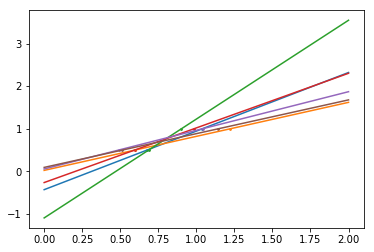

In [105]:
X = np.c_[ .5, 1].T
y = [.5, 1]
test = np.c_[ 0, 2].T
regr = linear_model.LinearRegression()

import pylab as pl
np.random.seed(0)

%matplotlib inline
pl.figure()

for _ in range(6):
    this_X = .1*np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    pl.plot(test, regr.predict(test))
    pl.scatter(this_X, y, s=3)

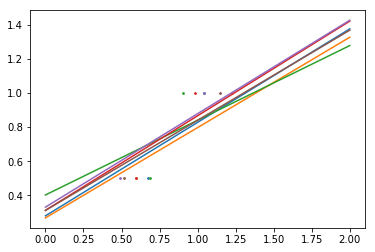

In [106]:
regr = linear_model.Ridge(alpha=.1)

pl.figure() 

np.random.seed(0)
for _ in range(6): 
    this_X = .1*np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    pl.plot(test, regr.predict(test)) 
    pl.scatter(this_X, y, s=3)

In [107]:
# We can choose alpha to minimize left out error, this time using the diabetes dataset rather 
# than our synthetic data
from __future__ import print_function

alphas = np.logspace(-4, -1, 6)
print([regr.set_params(alpha=alpha
            ).fit(diabetes_X_train, diabetes_y_train,
            ).score(diabetes_X_test, diabetes_y_test) for alpha in alphas])

[0.58511106838835314, 0.58520730154446765, 0.58546775406984919, 0.58555120365039159, 0.58307170855541635, 0.570589994372801]


In [108]:
regr = linear_model.Lasso()
scores = [regr.set_params(alpha=alpha
            ).fit(diabetes_X_train, diabetes_y_train
            ).score(diabetes_X_test, diabetes_y_test)
       for alpha in alphas]
best_alpha = alphas[scores.index(max(scores))]
regr.alpha = best_alpha
regr.fit(diabetes_X_train, diabetes_y_train)

Lasso(alpha=0.025118864315095794, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [109]:
# Coefficient of the features in the decision function
print(regr.coef_)

[   0.         -212.43764548  517.19478111  313.77959962 -160.8303982    -0.
 -187.19554705   69.38229038  508.66011217   71.84239008]


In [110]:
# Logistic regression
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(iris_X_train, iris_y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [112]:
# Classify digits dataset with knn and logistic regression
from sklearn import datasets, neighbors, linear_model

# Digits dataset
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

n_samples = len(X_digits)

# Train/test 90/10
X_train = X_digits[:int(.9 * n_samples)]
y_train = y_digits[:int(.9 * n_samples)]
X_test = X_digits[int(.9 * n_samples):]
y_test = y_digits[int(.9 * n_samples):]

# Classifiers
knn = neighbors.KNeighborsClassifier()
logistic = linear_model.LogisticRegression()

# Output
print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))
print('LogisticRegression score: %f'
      % logistic.fit(X_train, y_train).score(X_test, y_test))

KNN score: 0.961111
LogisticRegression score: 0.938889


In [113]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(iris_X_train, iris_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [114]:
# Linear Kernel
svc = svm.SVC(kernel='linear')

In [115]:
# Polynomial Kernel
svc = svm.SVC(kernel='poly', degree=3)     # degree: polynomial degree

In [116]:
# Radial Basis Function Kernel
svc = svm.SVC(kernel='rbf')                # gamma: inverse of size of radial kernel

In [117]:
from __future__ import division, print_function

print(__doc__)

# Author: Peter Prettenhoer <peter.prettenhofer@gmail.com>
#
# License: BSD 3 clause

import matplotlib
matplotlib.use('TkAgg')

from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.backends.backend_tkagg import NavigationToolbar2TkAgg
from matplotlib.figure import Figure
from matplotlib.contour import ContourSet

try:
    import tkinter as Tk
except ImportError:
    # Backward compat for Python 2
    import Tkinter as Tk

import sys
import numpy as np

from sklearn import svm
from sklearn.datasets import dump_svmlight_file
from sklearn.externals.six.moves import xrange

y_min, y_max = -50, 50
x_min, x_max = -50, 50


class Model(object):
    """The Model which hold the data. It implements the
    observable in the observer pattern and notifies the
    registered observers on change event.
    """

    def __init__(self):
        self.observers = []
        self.surface = None
        self.data = []
        self.cls = None
        self.surface_type = 0

    def changed(self, event):
        """Notify the observers. """
        for observer in self.observers:
            observer.update(event, self)

    def add_observer(self, observer):
        """Register an observer. """
        self.observers.append(observer)

    def set_surface(self, surface):
        self.surface = surface

    def dump_svmlight_file(self, file):
        data = np.array(self.data)
        X = data[:, 0:2]
        y = data[:, 2]
        dump_svmlight_file(X, y, file)


class Controller(object):
    def __init__(self, model):
        self.model = model
        self.kernel = Tk.IntVar()
        self.surface_type = Tk.IntVar()
        # Whether or not a model has been fitted
        self.fitted = False

    def fit(self):
        print("fit the model")
        train = np.array(self.model.data)
        X = train[:, 0:2]
        y = train[:, 2]

        C = float(self.complexity.get())
        gamma = float(self.gamma.get())
        coef0 = float(self.coef0.get())
        degree = int(self.degree.get())
        kernel_map = {0: "linear", 1: "rbf", 2: "poly"}
        if len(np.unique(y)) == 1:
            clf = svm.OneClassSVM(kernel=kernel_map[self.kernel.get()],
                                  gamma=gamma, coef0=coef0, degree=degree)
            clf.fit(X)
        else:
            clf = svm.SVC(kernel=kernel_map[self.kernel.get()], C=C,
                          gamma=gamma, coef0=coef0, degree=degree)
            clf.fit(X, y)
        if hasattr(clf, 'score'):
            print("Accuracy:", clf.score(X, y) * 100)
        X1, X2, Z = self.decision_surface(clf)
        self.model.clf = clf
        self.model.set_surface((X1, X2, Z))
        self.model.surface_type = self.surface_type.get()
        self.fitted = True
        self.model.changed("surface")

    def decision_surface(self, cls):
        delta = 1
        x = np.arange(x_min, x_max + delta, delta)
        y = np.arange(y_min, y_max + delta, delta)
        X1, X2 = np.meshgrid(x, y)
        Z = cls.decision_function(np.c_[X1.ravel(), X2.ravel()])
        Z = Z.reshape(X1.shape)
        return X1, X2, Z

    def clear_data(self):
        self.model.data = []
        self.fitted = False
        self.model.changed("clear")

    def add_example(self, x, y, label):
        self.model.data.append((x, y, label))
        self.model.changed("example_added")

        # update decision surface if already fitted.
        self.refit()

    def refit(self):
        """Refit the model if already fitted. """
        if self.fitted:
            self.fit()


class View(object):
    """Test docstring. """
    def __init__(self, root, controller):
        f = Figure()
        ax = f.add_subplot(111)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlim((x_min, x_max))
        ax.set_ylim((y_min, y_max))
        canvas = FigureCanvasTkAgg(f, master=root)
        canvas.show()
        canvas.get_tk_widget().pack(side=Tk.TOP, fill=Tk.BOTH, expand=1)
        canvas._tkcanvas.pack(side=Tk.TOP, fill=Tk.BOTH, expand=1)
        canvas.mpl_connect('button_press_event', self.onclick)
        toolbar = NavigationToolbar2TkAgg(canvas, root)
        toolbar.update()
        self.controllbar = ControllBar(root, controller)
        self.f = f
        self.ax = ax
        self.canvas = canvas
        self.controller = controller
        self.contours = []
        self.c_labels = None
        self.plot_kernels()

    def plot_kernels(self):
        self.ax.text(-50, -60, "Linear: $u^T v$")
        self.ax.text(-20, -60, "RBF: $\exp (-\gamma \| u-v \|^2)$")
        self.ax.text(10, -60, "Poly: $(\gamma \, u^T v + r)^d$")

    def onclick(self, event):
        if event.xdata and event.ydata:
            if event.button == 1:
                self.controller.add_example(event.xdata, event.ydata, 1)
            elif event.button == 3:
                self.controller.add_example(event.xdata, event.ydata, -1)

    def update_example(self, model, idx):
        x, y, l = model.data[idx]
        if l == 1:
            color = 'w'
        elif l == -1:
            color = 'k'
        self.ax.plot([x], [y], "%so" % color, scalex=0.0, scaley=0.0)

    def update(self, event, model):
        if event == "examples_loaded":
            for i in xrange(len(model.data)):
                self.update_example(model, i)

        if event == "example_added":
            self.update_example(model, -1)

        if event == "clear":
            self.ax.clear()
            self.ax.set_xticks([])
            self.ax.set_yticks([])
            self.contours = []
            self.c_labels = None
            self.plot_kernels()

        if event == "surface":
            self.remove_surface()
            self.plot_support_vectors(model.clf.support_vectors_)
            self.plot_decision_surface(model.surface, model.surface_type)

        self.canvas.draw()

    def remove_surface(self):
        """Remove old decision surface."""
        if len(self.contours) > 0:
            for contour in self.contours:
                if isinstance(contour, ContourSet):
                    for lineset in contour.collections:
                        lineset.remove()
                else:
                    contour.remove()
            self.contours = []

    def plot_support_vectors(self, support_vectors):
        """Plot the support vectors by placing circles over the
        corresponding data points and adds the circle collection
        to the contours list."""
        cs = self.ax.scatter(support_vectors[:, 0], support_vectors[:, 1],
                             s=80, edgecolors="k", facecolors="none")
        self.contours.append(cs)

    def plot_decision_surface(self, surface, type):
        X1, X2, Z = surface
        if type == 0:
            levels = [-1.0, 0.0, 1.0]
            linestyles = ['dashed', 'solid', 'dashed']
            colors = 'k'
            self.contours.append(self.ax.contour(X1, X2, Z, levels,
                                                 colors=colors,
                                                 linestyles=linestyles))
        elif type == 1:
            self.contours.append(self.ax.contourf(X1, X2, Z, 10,
                                                  cmap=matplotlib.cm.bone,
                                                  origin='lower', alpha=0.85))
            self.contours.append(self.ax.contour(X1, X2, Z, [0.0], colors='k',
                                                 linestyles=['solid']))
        else:
            raise ValueError("surface type unknown")


class ControllBar(object):
    def __init__(self, root, controller):
        fm = Tk.Frame(root)
        kernel_group = Tk.Frame(fm)
        Tk.Radiobutton(kernel_group, text="Linear", variable=controller.kernel,
                       value=0, command=controller.refit).pack(anchor=Tk.W)
        Tk.Radiobutton(kernel_group, text="RBF", variable=controller.kernel,
                       value=1, command=controller.refit).pack(anchor=Tk.W)
        Tk.Radiobutton(kernel_group, text="Poly", variable=controller.kernel,
                       value=2, command=controller.refit).pack(anchor=Tk.W)
        kernel_group.pack(side=Tk.LEFT)

        valbox = Tk.Frame(fm)
        controller.complexity = Tk.StringVar()
        controller.complexity.set("1.0")
        c = Tk.Frame(valbox)
        Tk.Label(c, text="C:", anchor="e", width=7).pack(side=Tk.LEFT)
        Tk.Entry(c, width=6, textvariable=controller.complexity).pack(
            side=Tk.LEFT)
        c.pack()

        controller.gamma = Tk.StringVar()
        controller.gamma.set("0.01")
        g = Tk.Frame(valbox)
        Tk.Label(g, text="gamma:", anchor="e", width=7).pack(side=Tk.LEFT)
        Tk.Entry(g, width=6, textvariable=controller.gamma).pack(side=Tk.LEFT)
        g.pack()

        controller.degree = Tk.StringVar()
        controller.degree.set("3")
        d = Tk.Frame(valbox)
        Tk.Label(d, text="degree:", anchor="e", width=7).pack(side=Tk.LEFT)
        Tk.Entry(d, width=6, textvariable=controller.degree).pack(side=Tk.LEFT)
        d.pack()

        controller.coef0 = Tk.StringVar()
        controller.coef0.set("0")
        r = Tk.Frame(valbox)
        Tk.Label(r, text="coef0:", anchor="e", width=7).pack(side=Tk.LEFT)
        Tk.Entry(r, width=6, textvariable=controller.coef0).pack(side=Tk.LEFT)
        r.pack()
        valbox.pack(side=Tk.LEFT)

        cmap_group = Tk.Frame(fm)
        Tk.Radiobutton(cmap_group, text="Hyperplanes",
                       variable=controller.surface_type, value=0,
                       command=controller.refit).pack(anchor=Tk.W)
        Tk.Radiobutton(cmap_group, text="Surface",
                       variable=controller.surface_type, value=1,
                       command=controller.refit).pack(anchor=Tk.W)

        cmap_group.pack(side=Tk.LEFT)

        train_button = Tk.Button(fm, text='Fit', width=5,
                                 command=controller.fit)
        train_button.pack()
        fm.pack(side=Tk.LEFT)
        Tk.Button(fm, text='Clear', width=5,
                  command=controller.clear_data).pack(side=Tk.LEFT)


def get_parser():
    from optparse import OptionParser
    op = OptionParser()
    op.add_option("--output",
                  action="store", type="str", dest="output",
                  help="Path where to dump data.")
    return op


def main(argv):
    op = get_parser()
    opts, args = op.parse_args(argv[1:])
    root = Tk.Tk()
    model = Model()
    controller = Controller(model)
    root.wm_title("Scikit-learn Libsvm GUI")
    view = View(root, controller)
    model.add_observer(view)
    Tk.mainloop()

    if opts.output:
        model.dump_svmlight_file(opts.output)

if __name__ == "__main__":
    main(sys.argv)


Digits Classification Exercise

A tutorial exercise regarding the use of classification techniques on
the Digits dataset.

This exercise is used in the :ref:`clf_tut` part of the
:ref:`supervised_learning_tut` section of the
:ref:`stat_learn_tut_index`.



C:\Users\BNielson\Anaconda3\envs\PythonMachineLearning\lib\site-packages\matplotlib\__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
Usage: ipykernel_launcher.py [options]

ipykernel_launcher.py: error: no such option: -f


SystemExit: 2

C:\Users\BNielson\Anaconda3\envs\PythonMachineLearning\lib\site-packages\IPython\core\interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
